<a href="https://colab.research.google.com/github/Dr-Banana/Datafest/blob/main/datafest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [484]:
import pandas as pd
import random
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import repeat


以下为替换文件

In [485]:
def tot(data,key):
  chart_data = pd.DataFrame(data=data['event_time_dbl'])
  series = pd.Series(chart_data.index)
  chart_data['index'] = series
  chart_data['event_category'] = pd.DataFrame(data=data['event_category'])
  b = chart_data.loc[(chart_data['event_category']==key)]
  b["diff"] = b['event_time_dbl'].diff()
  sec = b.loc[(b['diff']<1000)&(np.isnan(b['diff'])==False), 'diff'].sum()
  return(sec/60)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (38,39,40,129) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (38,39,40,47,50,53,54,57,58,59,60,62,85,86,88,89,90,91,92,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/

Text(66.5, 0.5, 'Types of minigames')

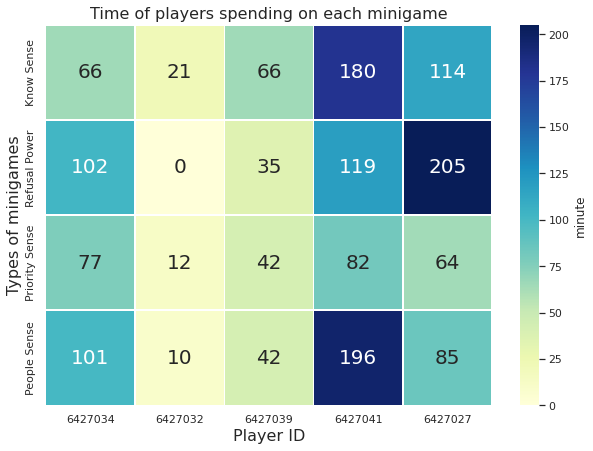

In [486]:
linkList = ["https://raw.githubusercontent.com/Dr-Banana/Datafest/main/6427034.csv","https://raw.githubusercontent.com/Dr-Banana/Datafest/main/6427032.csv","https://raw.githubusercontent.com/Dr-Banana/Datafest/main/6427039.csv","https://raw.githubusercontent.com/Dr-Banana/Datafest/main/6427041.csv","https://raw.githubusercontent.com/Dr-Banana/Datafest/main/6427027.csv"]
num = ["6427034","6427032","6427039","6427041","6427027"]
readList = ['Knowledge Minigame','Refuse Power Minigame','Priority Sense','People Sense']
df_list = []
df = pd.DataFrame()
df.index = readList
for l in range(len(linkList)):
  df_list = []
  df_data1 = pd.read_csv(linkList[l])
  for k in range(4):
    df_list.append(tot(df_data1,readList[k]))
  df[num[l]] = df_list
# dfm = df.melt('readList', var_name='num', value_name='vals')
readList = ['Know Sense','Refusal Power','Priority Sense','People Sense']
df.index = readList
sns.set(rc = {'figure.figsize':(10,7)})
a = sns.heatmap(df, cmap="YlGnBu", linewidths=.5,fmt='.0f', annot=True,annot_kws={'size': 20},cbar_kws={'label': 'minute'})
plt.title('Time of players spending on each minigame',fontsize=16)
plt.xlabel('Player ID', fontsize=16)
plt.ylabel('Types of minigames', fontsize=16)

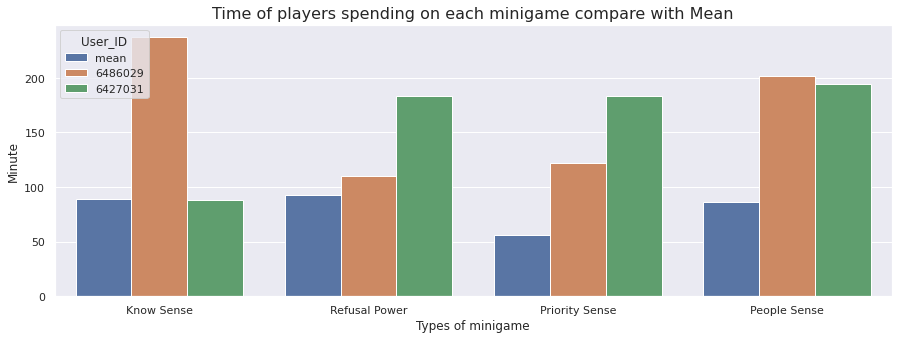

In [487]:
df_1 = pd.DataFrame()
df_1["mean"] = df.mean(axis=1)
df_1["6486029"] = [237,109.8,122.4,201.6]
df_1["6427031"] = [88.2,183.6,183.6,194.4]
df_1["Types of minigame"] = readList
plt.figure(figsize=(15,5))
plt.title('Time of players spending on each minigame compare with Mean',fontsize=16)
dfm = df_1.melt('Types of minigame', var_name='User_ID', value_name='Minute')
sns.barplot(x='Types of minigame', y='Minute', hue='User_ID', data=dfm)

In [488]:
def tot_year(data,key,year_key):
  chart_data = pd.DataFrame(data=data['event_time_dbl'])
  series = pd.Series(chart_data.index)
  chart_data['index'] = series
  chart_data['date'] = data['date']
  chart_data['event_category'] = pd.DataFrame(data=data['event_category'])
  b = chart_data.loc[(chart_data['event_category']==key)&(chart_data['date']==year_key)]
  b["diff"] = b['event_time_dbl'].diff()
  sec = b.loc[(b['diff']<1500)&(np.isnan(b['diff'])==False), 'diff'].sum()
  return(sec/60)

In [489]:
df_scatter = pd.read_csv(linkList[3])
new_data = pd.DataFrame()
yearList = ["3/28/2014","4/2/2014","4/23/2014","4/25/2014","5/7/2014","5/9/2014","5/14/2014","5/16/2014","5/21/2014","5/28/2014","5/30/2014"]
interval = [0,3,7,12]
df_list = []
pList = []
for l in range(4):
  for k in range(0,3):
    df_list.append(tot_year(df_scatter,readList[l],yearList[k]))
  pList.append(sum(df_list)/len(df_list))
new_data[3] = pList
pList = []
for l in range(4):
  for k in range(3,7):
    df_list.append(tot_year(df_scatter,readList[l],yearList[k]))
  pList.append(sum(df_list)/len(df_list))
new_data[6] = pList
pList = []
for l in range(4):
  for k in range(7,11):
    df_list.append(tot_year(df_scatter,readList[l],yearList[k]))
  pList.append(sum(df_list)/len(df_list))
new_data[12] = pList
readList = ['Know Sense','Refusal Power','Priority Sense','People Sense']
new_data.index = readList
new_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (38,39,40,47,70,78,81,129) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,3,6,12
Know Sense,0.000000,4.016667,5.395313
Refusal Power,0.000000,3.213333,4.795833
Priority Sense,2.116667,4.168750,4.810000
People Sense,5.355556,6.166071,6.321591
